<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Machine-Learning/blob/master/4_2_Supervised_Learning_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Models**

**Linear Models for Regression**

For regression, the general prediction formula for a linear model looks as follows: 

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Here, x[0] to x[p] denotes the features (in this example, the number of features is p+1) of a single data point, w and b are parameters of the model that are learned, and ŷ is the prediction the model makes. 

For a dataset with a single feature, this is:
ŷ = w[0] * x[0] + b
which you might remember from high school mathematics as the equation for a line. Here, w[0] is the slope and b is the y-axis offset. For more features, w contains the slopes along each feature axis. Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the entries of w.

In [11]:
!pip install mglearn

w[0]: 0.393906  b: -0.031804


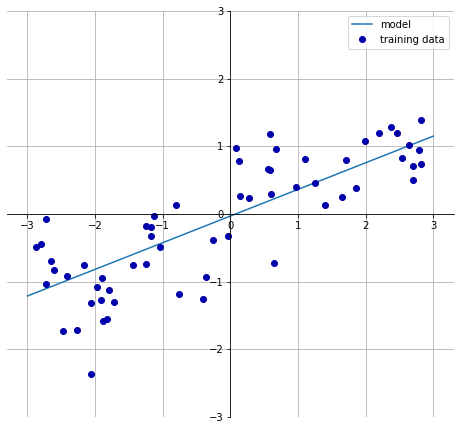

In [12]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

Looking at w[0] we see that the slope should be around 0.4, which we can confirm visually in the plot. The intercept is where the prediction line should cross the y-axis: this is slightly below zero, which you can also confirm in the image.

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyper‐ plane in higher dimensions (that is, when using more features).

If you compare the predictions made by the straight line with those made by the KNeighborsRegressor, using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost. In a sense, this is true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat skewed perspective. For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

There are many different linear models for regression.

**Linear regression (aka ordinary least squares)**

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

**Step 1 - Loading the data**

In [13]:
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=40)

**Step 2 - Train-Test Split**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

**Step 3 - Building the Model**

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

**Step 4 - Training the Model**

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 5 - Making the Predictions**

In [17]:
print("Test set prediction {}".format(lr.predict(X_test)))

Test set prediction [ 0.90558131 -0.90145215  0.42515939 -0.57820859 -0.85432225 -0.61256977
 -0.02372291  0.69169983 -0.9696576   0.48810788]


**Step 6 - Evaluating the Model**

In [18]:
print("Train score : {}".format(lr.score(X_train, y_train)))
print("Test score : {}".format(lr.score(X_test, y_test)))

Train score : 0.6835587020533835
Test score : 0.6735973782183866


The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [19]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.44008435]
lr.intercept_: -0.06130903623121073


The intercept_ attribute is always a single float number, while the coef_ attribute is a NumPy array with one entry per input feature. As we only have a single input feature in the wave dataset, lr.coef_ only has a single entry.

An R2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not over‐ fitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more pow‐ erful, and there is a higher chance of overfitting.

Let’s take a look at how LinearRe gression performs on a more complex dataset, like the Boston Housing dataset. Remember that this dataset has 506 samples and 105 derived features.

**Step 1 - Loading the data**

In [20]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

**Step 2 - Train-Test Split**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

**Step 3 - Building the Model**

In [22]:
from sklearn.neighbors import KNeighborsRegressor
lr = KNeighborsRegressor()

**Step 4 - Training the Model**

In [23]:
lr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**Step 5 - Making the Predictions**

In [24]:
print("Test set prediction {}".format(lr.predict(X_test)))

Test set prediction [28.28 25.26 19.06 21.34 24.24 20.16 13.96 26.38 10.04 23.64 17.94 26.04
 21.46 26.72 21.62 21.52 21.74 19.76 27.04 19.5  14.76 12.52 25.98 29.38
 14.82 22.9  26.04 15.06 10.38 26.38 14.42 12.52 20.82 10.38 16.82 10.24
 27.54 13.28 12.3  19.76 20.84 26.74 21.52 16.76 24.58 11.34 24.94 23.44
 29.   19.54 28.84 32.24 23.02 27.9  21.76 25.3  23.   33.56 22.58 21.9
 19.5  27.24 16.3  34.24 20.38 20.82 21.66 41.74 17.94 35.52 19.5  25.16
 20.82 23.84 16.76 14.54 32.02 12.82 21.38 40.92  8.28 14.82 34.08 15.32
 11.02 21.9  21.16 23.88 21.7  22.66 24.1  20.74 27.24 35.46 27.04 19.06
 18.94 21.32 35.46 27.48 11.32 19.58 20.28 25.44 32.44 26.04  9.2  14.4
 20.6  23.62 17.94 22.5  20.42 11.84 18.92 22.24 17.94 21.28 16.42 21.52
 14.88 42.88 20.4  10.84 30.84 10.7  21.06]


**Step 6 - Evaluating the Model**

In [25]:
print("Train score : {}".format(lr.score(X_train, y_train)))
print("Test score : {}".format(lr.score(X_test, y_test)))

Train score : 0.8235989534796126
Test score : 0.7181964594261468


In [26]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.

**Ridge Regression**

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization. (**Regularisations will be taught later in detail**)

**Step 1 - Loading the data**

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

**Step 2 - Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Step 3 - Building the Model**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

**Step 4 - Training the model**

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:

In [ ]:
ridge.fit(X_train, y_train)

**Step 5 - Making the predictions**

In [ ]:
print("Test set prediction {}".format(ridge.predict(X_test)))

**Step 6 - Evaluating the model**

In [ ]:
print("Train score : {}".format(ridge.score(X_train, y_train)))
print("Test score : {}".format(ridge.score(X_test, y_test)))

In [ ]:
print("lr.coef_: {}".format(ridge.coef_)) 
print("lr.intercept_: {}".format(ridge.intercept_))

As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example:

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Decreasing alpha allows the coefficients to be less restricted, meaning we move right. For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression:

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the coef_ attribute of models with different values of alpha. A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10") 
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25) 
plt.legend()

Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated with the first feature, x=1 the coefficient associated with the second feature, and so on up to x=100. The y-axis shows the numeric values of the corresponding values of the coefficients. The main takeaway here is that for alpha=10, the coefficients are mostly between around –3 and 3. The coefficients for the Ridge model with alpha=1 are somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still, and many of the dots corresponding to linear regression without any regularization (which would be alpha=0) are so large they are outside of the chart.

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. We subsampled the Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on subsets of increasing size (plots that show model performance as a function of dataset size are called learning curves):

In [ ]:
mglearn.plots.plot_ridge_n_samples()


As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. 

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here when using the full dataset is just by chance). Another interesting aspect of Figure 2-13 is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

**Lasso Regression**

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

**Step 1 - Loading the data**

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

**Step 2 - Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Step 3 - Building the Model**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

**Step 4 - Training the model**

In [ ]:
lasso.fit(X_train, y_train)

**Step 5 - Making the predictions**

In [ ]:
print("Test set prediction {}".format(lasso.predict(X_test)))

**Step 6 - Evaluating the model**

In [ ]:
print("Train set score : {}".format(lasso.score(X_train, y_train)))
print("Test set score : {}".format(lasso.score(X_test, y_test)))

As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. 

In [ ]:
import numpy as np

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression:

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Again, we can plot the coefficients of the different models.

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1") 
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")

For alpha=1, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing alpha to 0.01, we obtain the solution shown as an upward pointing triangle, which causes most features to be exactly zero. Using alpha=0.0001, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude. For comparison, the best Ridge solution is shown as circles. The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to under‐ stand, as it will select only a subset of the input features. scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. 

**Linear Models for classification**

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the intercept (b).

For linear models for regression, the output, ŷ, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classi‐ fier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

**Logistic Regression**

**Step 1 - Loading the data**

In [ ]:
X, y = mglearn.datasets.make_forge()

**Step 2 - Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Step 3 - Building the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

**Step 4 - Training the model**

In [ ]:
clf.fit(X_train, y_train)

**Step 5 - Making the predictions**

In [ ]:
print("Test set prediction {}".format(clf.predict(X_test)))

**Step 6 - Evaluating the model**

In [ ]:
print("Train set accuracy : {}".format(clf.score(X_train, y_train)))
print("Test set accuracy : {}".format(clf.score(X_test, y_test)))

**Linear Support Vector Classifier**

**Step 1 - Loading the data**

In [ ]:
X, y = mglearn.datasets.make_forge()

**Step 2 - Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Step 3 - Building the Model**

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

**Step 4 - Training the model**

In [ ]:
clf.fit(X_train, y_train)

**Step 5 - Making the predictions**

In [ ]:
print("Test set prediction {}".format(clf.predict(X_test)))

**Step 6 - Evaluating the model**

In [ ]:
print("Train set accuracy : {}".format(clf.score(X_train, y_train)))
print("Test set accuracy : {}".format(clf.score(X_test, y_test)))

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, Logis ticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classi‐ fied correctly.

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

LogisticRegression applies an L2 regularization by default

**Linear models for multiclass classification**

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [ ]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape)

We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors): 
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

You can see that all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier. The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2. The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” Therefore, any point in this area will be classified as class 0 by the final classifier (the result of the classification confidence formula for classifier 0 is greater than zero, while it is smaller than zero for the other two classes).

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors): 
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

**Strengths, weakness and parameters Linear models(Classifier and Regressor)**

The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. In particular for the regression mod‐ els, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your fea‐ tures are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thou‐ sands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge, which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.

Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lowerdimensional spaces, other models might yield better generalization performance.